<a href="https://colab.research.google.com/github/wavesoumen/Phishing_Website_Detection/blob/main/TEAM_BYTE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Path = 'drive/My Drive/Zenteiq Project'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import pickle 

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
student_data = pd.read_csv(Path+'/student_list.csv')
student_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mothers qualification,Fathers qualification,Mothers occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
student_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mothers qualification,Fathers qualification,Mothers occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
student_data.shape

(4424, 35)

In [ ]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mothers qualification                           4424 non-null   int64  
 8   Fathers qualification                           4424 non-null   int64  
 9   Mothers occupation                       

In [ ]:
student_data.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mothers qualification                             0
Fathers qualification                             0
Mothers occupation                                0
Fathers occupation                                0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [ ]:
student_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4419    False
4420    False
4421    False
4422    False
4423    False
Length: 4424, dtype: bool

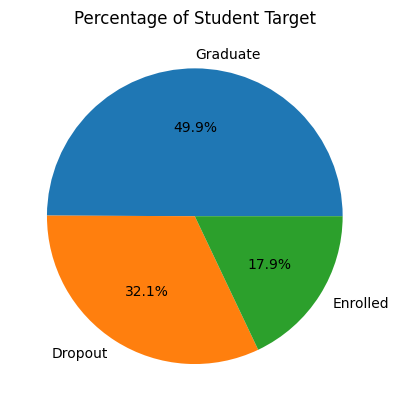

In [ ]:
student_target = student_data['Target'].value_counts()

plt.pie(student_target, labels=student_target.index, autopct='%1.1f%%')
plt.title('Percentage of Student Target')
plt.show()

demograpics

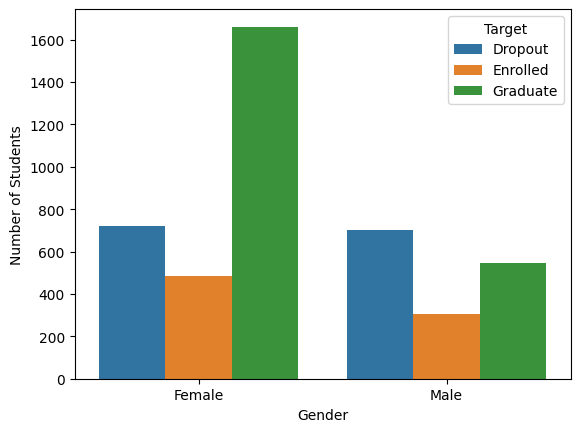

In [ ]:
sns.countplot(data=student_data, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Number of Students')
plt.show()

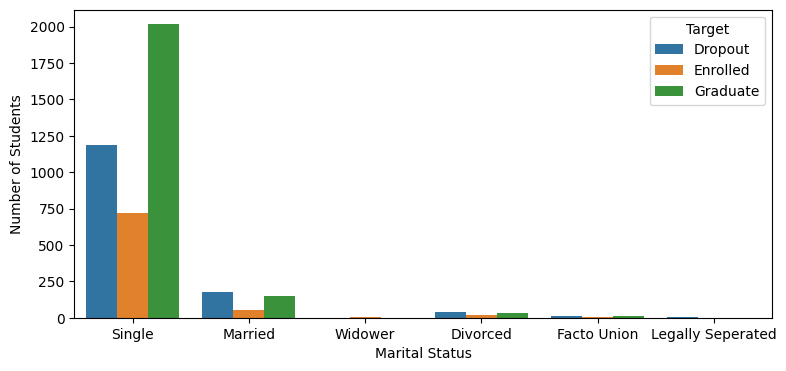

In [ ]:
plt.figure(figsize=(9,4))

sns.countplot(data=student_data, x='Marital status', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1,2,3,4,5], labels=['Single','Married','Widower','Divorced','Facto Union','Legally Seperated'])
plt.xlabel('Marital Status')
plt.ylabel('Number of Students')
plt.show()

In [ ]:
student_data['Marital status'].value_counts()

1    3919
2     379
4      91
5      25
6       6
3       4
Name: Marital status, dtype: int64

In [ ]:
student_data = student_data[student_data['Marital status'].isin([1, 2, 4, 5])]
student_data.shape

(4414, 35)

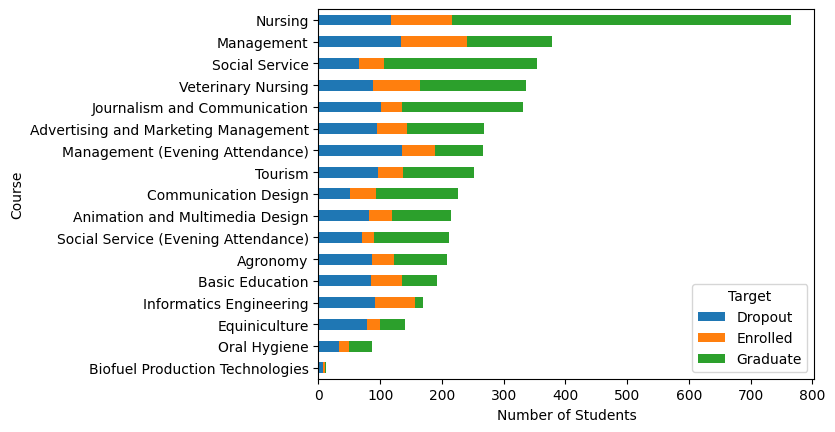

In [ ]:
student_course = student_data.groupby(['Course', 'Target']).size().reset_index().pivot(columns='Target', index='Course', values=0)

# Rename the index of the DataFrame
student_course = student_course.rename(index={1:'Biofuel Production Technologies',2:'Animation and Multimedia Design',3:'Social Service (Evening Attendance)',4:'Agronomy',5:'Communication Design',6:'Veterinary Nursing',7:'Informatics Engineering',8:'Equiniculture',9:'Management',10:'Social Service',11:'Tourism',12:'Nursing',13:'Oral Hygiene',14:'Advertising and Marketing Management',15:'Journalism and Communication',16:'Basic Education',17:'Management (Evening Attendance)'})

student_course_total = student_course.sum(axis=1)
student_course_sorted = student_course_total.sort_values(ascending=True)
student_course.loc[student_course_sorted.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.show()

In [ ]:
student_data['Course'].value_counts()

12    765
9     379
10    354
6     336
15    331
14    268
17    266
11    252
5     226
2     215
3     212
4     209
16    192
7     170
8     141
13     86
1      12
Name: Course, dtype: int64

In [ ]:
student_data = student_data[(student_data['Course'] != 1)]
student_data.shape

(4402, 35)

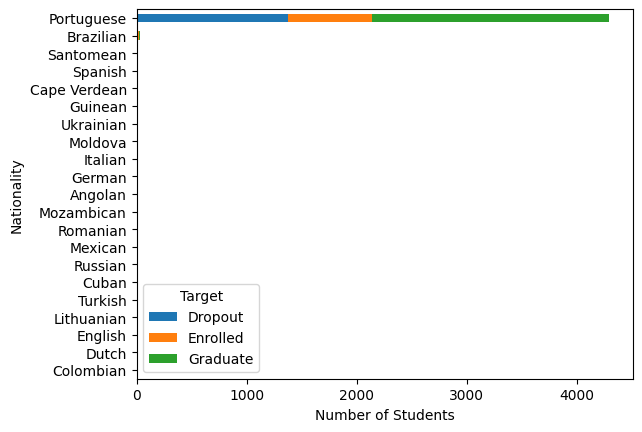

In [ ]:
student_nationality = student_data.groupby(['Nacionality', 'Target']).size().reset_index().pivot(columns='Target', index='Nacionality', values=0)

# Rename the index of the DataFrame
student_nationality = student_nationality.rename(index={1:'Portuguese', 2:'German', 3:'Spanish', 4:'Italian', 5:'Dutch', 6:'English', 7:'Lithuanian', 8:'Angolan', 9:'Cape Verdean', 10:'Guinean', 11:'Mozambican', 12:'Santomean', 13:'Turkish', 14:'Brazilian', 15:'Romanian', 16:'Moldova', 17:'Mexican', 18:'Ukrainian', 19:'Russian', 20:'Cuban', 21:'Colombian'})

student_nationality_total = student_nationality.sum(axis=1)
student_nationality_sorted = student_nationality_total.sort_values(ascending=True)
student_nationality.loc[student_nationality_sorted.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.ylabel('Nationality')
plt.show()


In [ ]:
student_data['Nacionality'].value_counts()

1     4294
14      36
12      14
9       13
3       13
10       5
16       3
4        3
18       3
8        2
17       2
15       2
11       2
2        2
19       2
13       1
5        1
21       1
20       1
6        1
7        1
Name: Nacionality, dtype: int64

In [ ]:
student_data = student_data[student_data['Nacionality'].isin([1, 14, 9, 12, 3])]
student_data.shape

(4370, 35)

In [ ]:
student_data.drop(['Nacionality'], axis = 1, inplace = True)
student_data.shape

(4370, 34)

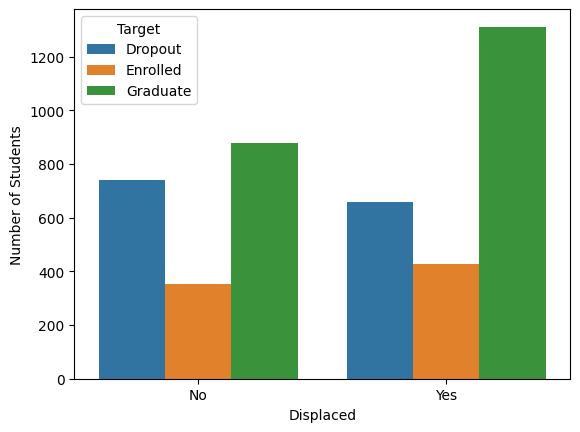

In [ ]:
sns.countplot(data=student_data, x='Displaced', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Number of Students')
plt.show()

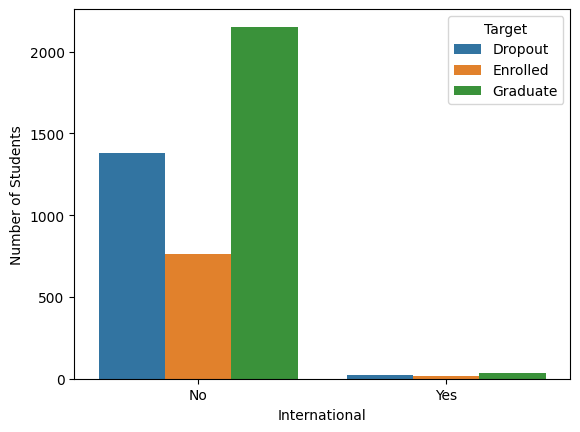

In [ ]:
sns.countplot(data=student_data, x='International', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Number of Students')
plt.show()

In [ ]:
student_data['International'].value_counts()

0    4294
1      76
Name: International, dtype: int64

In [ ]:
student_data = student_data[student_data['International'].isin([0])]
student_data.shape

(4294, 34)

In [ ]:
student_data.drop(['International'], axis = 1, inplace = True)
student_data.shape

(4294, 33)

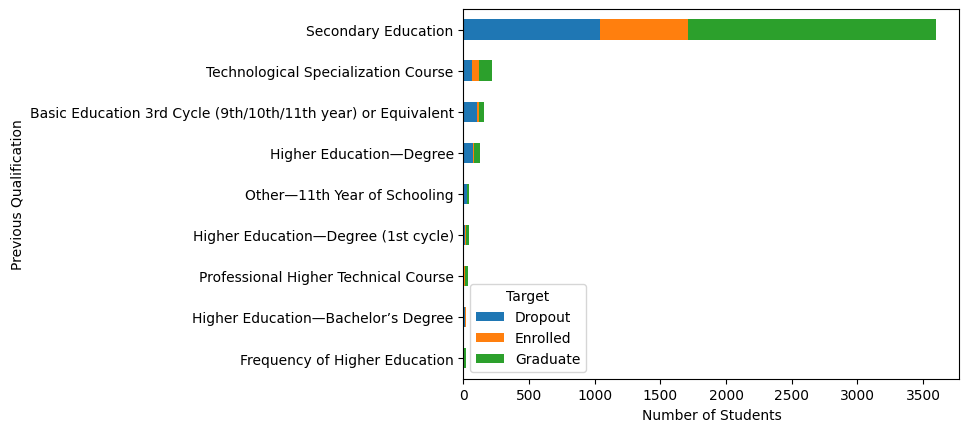

In [ ]:
student_prequal = student_data.groupby(['Previous qualification', 'Target']).size().reset_index().pivot(columns='Target', index='Previous qualification', values=0)

# Rename the index of the DataFrame
student_prequal = student_prequal.rename(index={1:'Secondary Education',2:'Higher Education—Bachelor’s Degree',3:'Higher Education—Degree',4:'Higher Education—Master’s Degree',5:'Higher Education—Doctorate',6:'Frequency of Higher Education',7:'12th Year of Schooling—Not Completed',8:'11th Year of Schooling—Not Completed',9:'Other—11th Year of Schooling',10:'10th Year of Schooling',11:'10th Year of Schooling—Not Completed',12:'Basic Education 3rd Cycle (9th/10th/11th year) or Equivalent',13:'Basic Education 2nd Cycle (6th/7th/8th year) or Equivalent',14:'Technological Specialization Course',15:'Higher Education—Degree (1st cycle)',16:'Professional Higher Technical Course',17:'Higher Education—Master’s Degree (2nd Cycle)'})

student_prequal_total = student_prequal.sum(axis=1)
student_prequal_sorted = student_prequal_total.sort_values(ascending=True)
student_prequal_top = student_prequal_sorted[8:]
student_prequal.loc[student_prequal_top.index].plot(kind='barh', stacked=True)

plt.xlabel('Count')
plt.xlabel('Number of Students')
plt.ylabel('Previous Qualification')
plt.show()

In [ ]:
student_data['Previous qualification'].value_counts()

1     3597
14     214
12     160
3      126
9       44
15      39
16      36
2       22
6       16
7       11
4        8
13       7
17       6
8        4
11       2
5        1
10       1
Name: Previous qualification, dtype: int64

In [ ]:
student_data = student_data[student_data['Previous qualification'].isin([1, 14, 12, 3, 9, 15, 16, 2, 6, 7])]
student_data.shape

(4265, 33)

In [ ]:
# student_data.drop(['Previous qualification'], axis = 1, inplace = True)
# student_data.shape

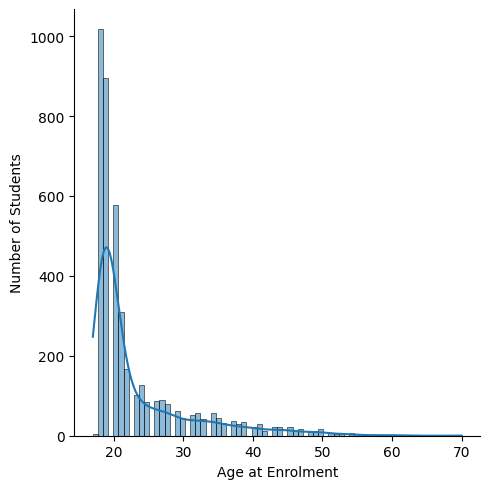

In [ ]:
sns.displot(data=student_data, x='Age at enrollment', kde=True)
student_data['Age at enrollment'].describe()

plt.xlabel('Age at Enrolment')
plt.ylabel('Number of Students')
plt.show()

In [ ]:
student_data['Age at enrollment'].value_counts()

18    1017
19     894
20     577
21     309
22     166
24     126
23     102
27      90
26      86
25      84
28      80
29      63
32      58
34      57
31      53
30      45
35      45
33      41
37      36
39      34
36      33
41      30
38      29
45      22
43      22
44      21
40      21
47      16
50      16
49      13
42      13
46      12
48      10
53       7
51       7
54       6
17       5
55       4
52       4
58       3
60       2
59       2
70       1
61       1
62       1
57       1
Name: Age at enrollment, dtype: int64

In [ ]:
student_data = student_data[student_data['Age at enrollment'].isin([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])]
student_data.shape

(4221, 33)

In [ ]:
# student_data.drop(['Age at enrollment'], axis = 1, inplace = True)
# student_data.shape

data analysis based on social and economic status of the students

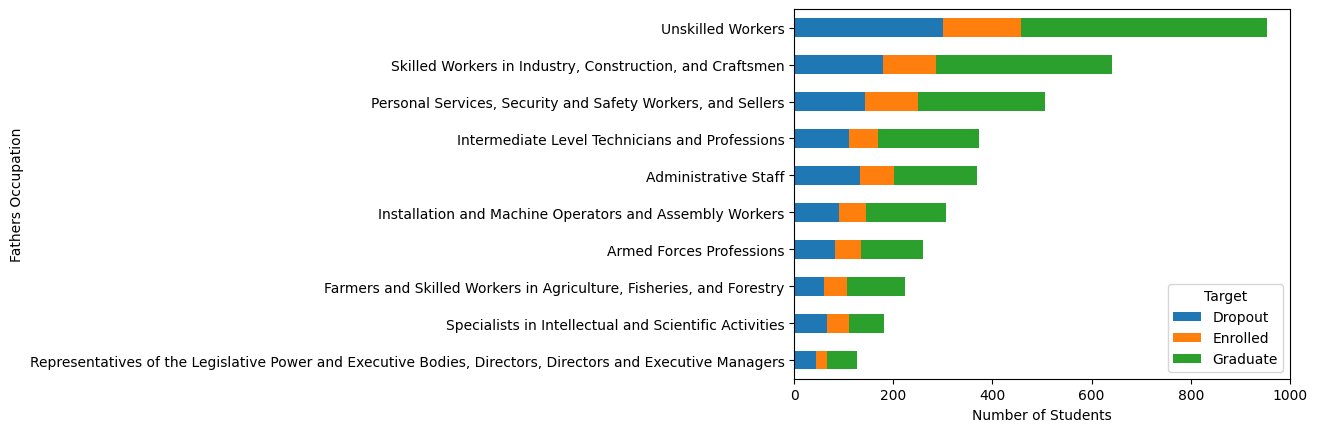

In [ ]:
student_occupation = student_data.groupby(["Fathers occupation", 'Target']).size().reset_index().pivot(columns='Target', index="Fathers occupation", values=0)

student_occupation = student_occupation.rename(index={1:'Student',2:'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',3:'Specialists in Intellectual and Scientific Activities',4:'Intermediate Level Technicians and Professions',5:'Administrative Staff',6:'Personal Services, Security and Safety Workers, and Sellers',7:'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry',8:'Skilled Workers in Industry, Construction, and Craftsmen',9:'Installation and Machine Operators and Assembly Workers',10:'Unskilled Workers',11:'Armed Forces Professions',12:'Other Situation',13:'(blank)',14:'Armed Forces Officers',15:'Armed Forces Sergeants',16:'Other Armed Forces personnel',17:'Directors of Administrative and Commercial Services',18:'Hotel, Catering, Trade, and Other Services Directors',19:'Specialists in the Physical Sciences, Mathematics, Engineering, and Related Techniques',20:'Health Professionals',21:'Teachers',22:'Specialists in Finance, Accounting, Administrative Organization, and Public and Commercial relations',23:'Intermediate Level Science and Engineering Technicians and Professions',24:'Technicians and Professionals of Intermediate Level of Health',25:'Intermediate Level Technicians from Legal, Social, Sports, Cultural, and Similar Services',26:'Information and Communication Technology Technicians',27:'Office Workers, Secretaries in General, and Data Processing Operators',28:'Data, Accounting, Statistical, Financial Services, and Registry-related Operators',29:'Other Administrative Support Staff',30:'Personal Service Workers',31:'Sellers',32:'Personal Care workers and The Like',33:'Protection and Security Services Personnel',34:'Market-oriented Farmers and Skilled Agricultural and Animal Production Workers',35:'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, and Subsistence',36:'Skilled Construction Workers and The Like, except Electricians',37:'Skilled Workers in Metallurgy, Metalworking, and Similar',38:'Skilled workers in Electricity and Electronics',39:'Workers in Food Processing, Woodworking, and Clothing and Other industries and Crafts',40:'Fixed Plant and Machine Operators',41:'Assembly Workers',42:'Vehicle Drivers and Mobile Equipment Operators',43:'Unskilled Workers in Agriculture, Animal Production, and Fisheries and Forestry',44:'Unskilled Workers in Extractive Industry, Construction, Manufacturing, and Transport',45:'Meal Preparation Assistants',46:'Street Vendors (except food) and Street Service Providers'})

student_occupation_total = student_occupation.sum(axis=1)
student_occupation_sorted = student_occupation_total.sort_values(ascending=True)
student_occupation_top10 = student_occupation_sorted[36:]
student_occupation.loc[student_occupation_top10.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.ylabel("Fathers Occupation")
plt.show()

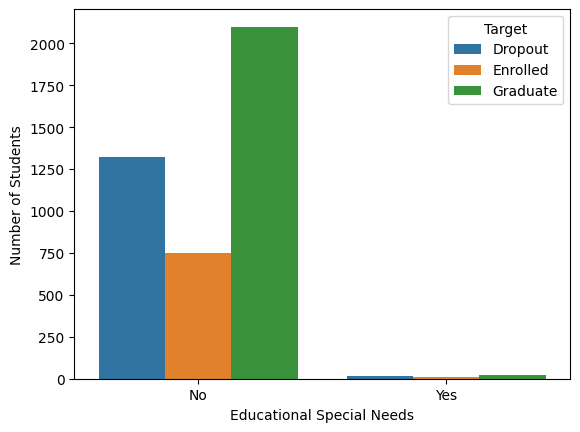

In [ ]:
sns.countplot(data=student_data, x='Educational special needs', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Educational Special Needs')
plt.ylabel('Number of Students')
plt.show()

In [ ]:
student_data['Educational special needs'].value_counts()

0    4172
1      49
Name: Educational special needs, dtype: int64

In [ ]:
student_data = student_data[student_data['Educational special needs'].isin([0])]
student_data.shape

(4172, 33)

In [ ]:
student_data.drop(['Educational special needs'], axis = 1, inplace = True)
student_data.shape

(4172, 32)

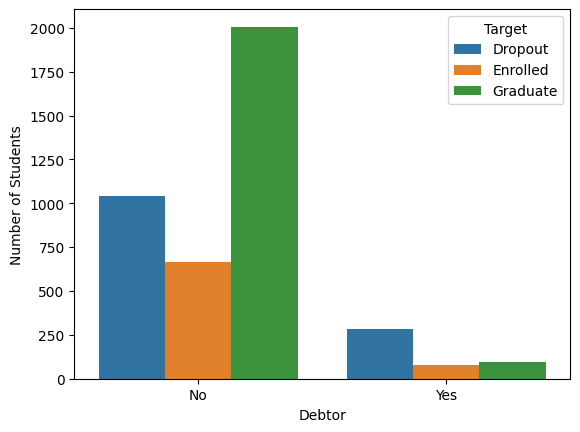

In [ ]:
sns.countplot(data=student_data, x="Debtor", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Debtor')
plt.ylabel('Number of Students')
plt.show()

In [ ]:
student_data['Debtor'].value_counts()

0    3714
1     458
Name: Debtor, dtype: int64

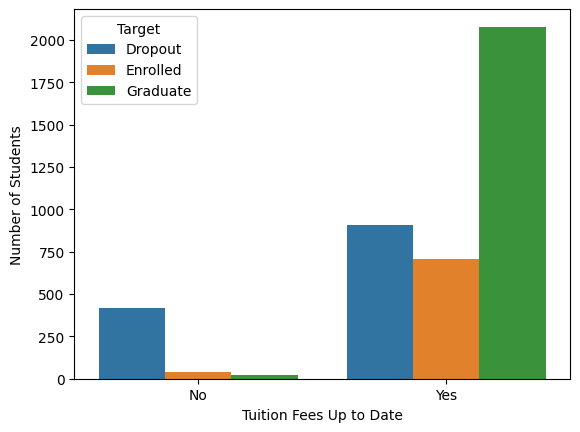

In [ ]:
sns.countplot(data=student_data, x="Tuition fees up to date", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Tuition Fees Up to Date')
plt.ylabel('Number of Students')
plt.show()

In [ ]:
student_data['Tuition fees up to date'].value_counts()

1    3689
0     483
Name: Tuition fees up to date, dtype: int64

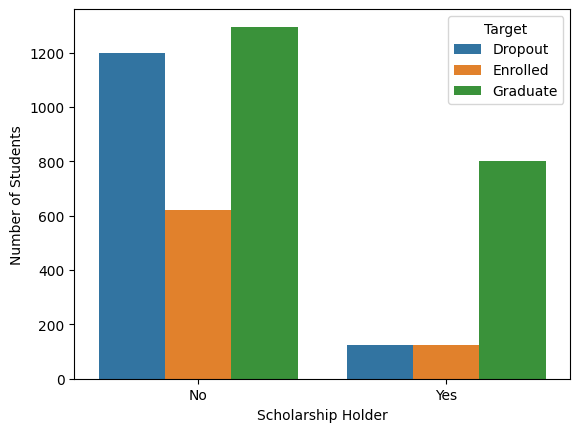

In [ ]:
sns.countplot(data=student_data, x="Scholarship holder", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Scholarship Holder')
plt.ylabel('Number of Students')
plt.show()

In [ ]:
student_data['Scholarship holder'].value_counts()

0    3117
1    1055
Name: Scholarship holder, dtype: int64

Macroeconomic Status

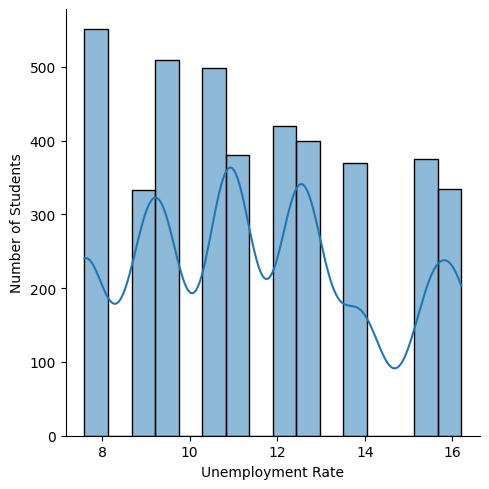

In [ ]:
sns.displot(data=student_data, x="Unemployment rate", kde=True)
student_data['Unemployment rate'].describe()

plt.xlabel('Unemployment Rate')
plt.ylabel('Number of Students')
plt.show()

In [ ]:
student_data['Unemployment rate'].value_counts()

7.6     551
9.4     510
10.8    499
12.4    420
12.7    399
11.1    380
15.5    375
13.9    370
16.2    335
8.9     333
Name: Unemployment rate, dtype: int64

Heatmap

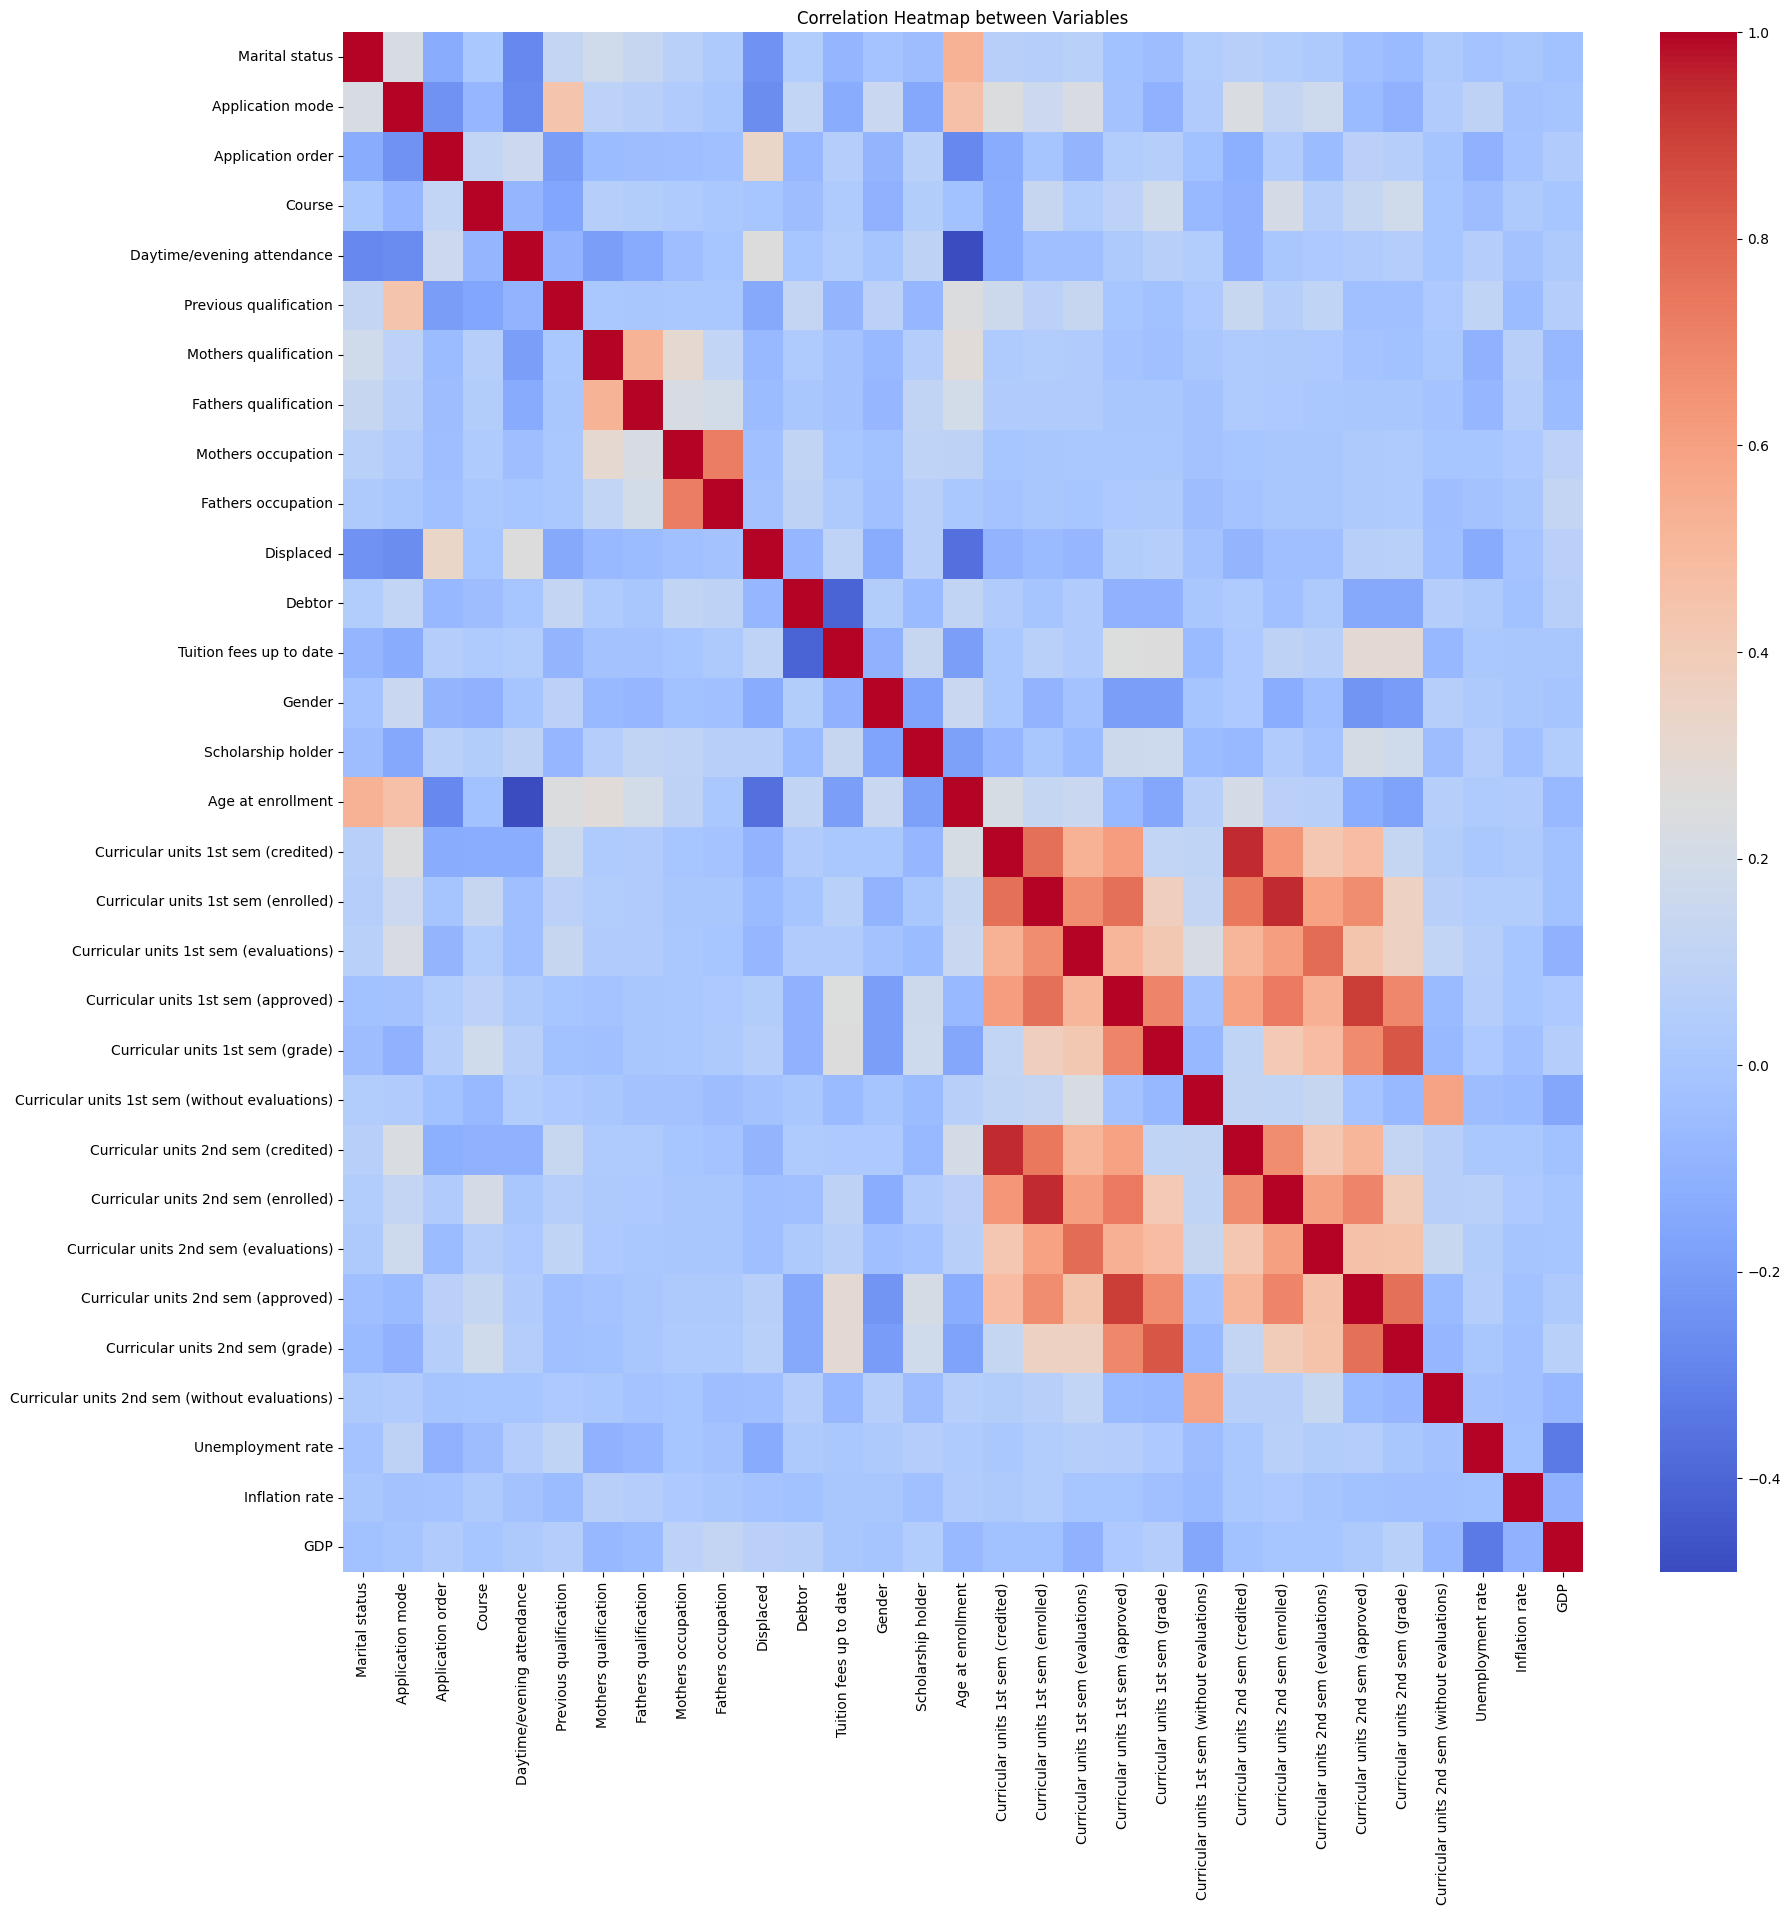

In [ ]:
plt.figure(figsize=(20,20))

sns.heatmap(student_data.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap between Variables')
plt.show()

Data Modelling Converting Target Variable into Numeric Form

In [ ]:
# student_data = student_data.drop(student_data[student_data['Target']=='Enrolled'].index)
# student_data.head()

In [ ]:
encoder = LabelEncoder()

In [ ]:
student_data['Target'] = encoder.fit_transform(student_data['Target'])

In [ ]:
student_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mothers qualification,Fathers qualification,Mothers occupation,Fathers occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,13,10,6,10,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,3,4,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,22,27,10,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,23,27,6,4,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,22,28,10,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4417,1,1,1,5,1,1,1,1,10,10,...,0,6,6,6,13.500000,0,16.2,0.3,-0.92,2
4418,1,15,1,5,1,14,3,28,4,10,...,5,9,10,7,13.142857,1,16.2,0.3,-0.92,2
4419,1,1,6,15,1,1,1,1,6,5,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4421,1,1,1,12,1,1,22,27,10,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0


In [ ]:
student_data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Mothers qualification', 'Fathers qualification', 'Mothers occupation',
       'Fathers occupation', 'Displaced', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target'],
     

In [ ]:
student_data['GDP'].value_counts()

 0.32    551
-3.12    510
 1.74    499
 1.79    420
-1.70    399
 2.02    380
-4.06    375
 0.79    370
-0.92    335
 3.51    333
Name: GDP, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
X = student_data[['Unemployment rate', 'Inflation rate', 'GDP']]
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

In [ ]:
student_data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Mothers qualification', 'Fathers qualification', 'Mothers occupation',
       'Fathers occupation', 'Displaced', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target'],
     

In [ ]:
Y = student_data[['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Mothers qualification', 'Fathers qualification', 'Mothers occupation',
       'Fathers occupation', 'Displaced', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)']]
target = student_data['Target']
feature = np.concatenate((scaled, Y), axis = 1)
# poly_features = PolynomialFeatures(degree = 2, include_bias = False)                
# X_poly = poly_features.fit_transform(feature)
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.20, random_state = 42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {'solver' : ['lbfgs', 'sag', 'saga', 'newton-cg'] , 'C': [0.1, 1, 10, 100, 110, 120]}
grid = GridSearchCV (estimator = LogisticRegression(multi_class = 'multinomial'), param_grid = param_grid , cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': [0.1, 1, 10, 100, 110, 120],
                         'solver': ['lbfgs', 'sag', 'saga', 'newton-cg']})

In [ ]:
grid.best_params_

{'C': 100, 'solver': 'lbfgs'}

In [ ]:
Softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 100)
Softmax_reg.fit(X_train, y_train)

LogisticRegression(C=100, multi_class='multinomial')

In [ ]:
predic = Softmax_reg.predict(X_test)
accuracy_score(y_test, predic)

0.7640718562874251

In [ ]:
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.metrics import classification_report
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import jaccard_score
# from sklearn.metrics import f1_score
# print('Accuracy = ', accuracy_score(y_test, predic))

In [ ]:
# from sklearn import metrics
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.metrics import classification_report
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import jaccard_score
# from sklearn.metrics import f1_score
# print('Precision = ', precision_score(y_test, predic))
# print('Recall = ', recall_score(y_test, predic))
# print('F1_Score = ', f1_score(y_test, predic))
# print('Accuracy = ', accuracy_score(y_test, predic))

In [ ]:
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.multiclass import OneVsOneClassifier
# from sklearn.svm import SVC
# ovr = OneVsRestClassifier(estimator = SVC())
# ovr.fit(X_train, y_train)
# predic1 = ovr.predict(X_test)
# accuracy_score(y_test, predic1)

In [ ]:
# ov = OneVsRestClassifier(estimator = SVC())
# ov.fit(X_train, y_train)
# predic2 = ovr.predict(X_test)
# accuracy_score(y_test, predic2)

In [ ]:
# from sklearn.svm import SVC
# svm = SVC(probability = True)
# svm.fit(X_train, y_train)

In [ ]:
# predic3 = svm.predict(X_test)
# accuracy_score(y_test, predic3)